# IYPT: Guitar String
Problem 11 of the 34th International Young Physicists' Tournament

## Analytical solution

using `sympy` library;

attempts to algorithmically find analytical solution for given parameters

In [22]:
from sympy import *

# global time
t = symbols('t')

# accepts parameters (optimal)
def analytical(
    beta    = symbols('beta'),
    gamma   = symbols('gamma'),
    omega_0 = symbols('omega_0'),
    m       = symbols('m'),
    F       = symbols('F', cls=Function),
    ):
    
    # second newton's law elements
    y        = symbols('y', cls=Function)
    ydprime  = y(t).diff(t, 2)
    damping  = 2 * beta * omega_0 * y(t).diff(t)
    system   = omega_0**2 * y(t) * (1 + gamma * y(t)**2)
    driving  = F(t) if callable(F) else F
    
    # putting it together
    lefthand = ydprime + damping + system
    ritehand = driving / m
    eq = Eq(lefthand, ritehand)
    print('input:')
    display(eq)
    
    # attempt to solve
    try: 
        return dsolve(eq)
    except NotImplementedError:
        return None

omega, phi = symbols('omega phi')
sol = analytical(
    gamma = 0,
    F = sin(omega * t + phi)
)

print('solution:')
display(sol)

input:


Eq(2*beta*omega_0*Derivative(y(t), t) + omega_0**2*y(t) + Derivative(y(t), (t, 2)), sin(omega*t + phi)/m)

solution:


Eq(y(t), C1*exp(omega_0*t*(-beta - sqrt(beta**2 - 1))) + C2*exp(omega_0*t*(-beta + sqrt(beta**2 - 1))) - 2*beta*omega*omega_0*cos(omega*t + phi)/(m*(4*beta**2*omega**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)) - omega**2*sin(omega*t + phi)/(m*(4*beta**2*omega**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)) + omega_0**2*sin(omega*t + phi)/(m*(4*beta**2*omega**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)))

## Numerical solution

calculating performed with `scipy`, `numpy` libraries,

plotting via `matplotlib` library;

displays approximate numerical solution for given model

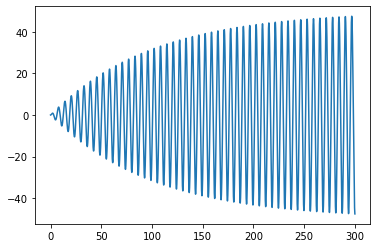

In [57]:
from numpy import *
from scipy.integrate import odeint 
from matplotlib import pyplot as plt

# parameters required
def numerical(
    beta,
    gamma,
    omega_0,
    m,
    F,
    y_0 = 0,
    duration = 100,
    sampling = 1000,
    ):

    # numerical model
    # y is list of the displacement function and its derivatives
    # t is respective time coordinate
    def model(y, t):
        system  = omega_0**2 * y[0] * (1 + gamma * y[0]**2)
        damping = 2 * beta * omega_0 * y[1]
        driving = F(t)
        return y[1], -system - damping + driving

    # initial conditions (x,y)
    initial = (0, y_0)

    # generate samples
    space = linspace(0, duration, duration * sampling)
    sols  = odeint(model, initial, space)
    sol   = sols[0:,1]
    
    return plt.plot(space, sol)

# define driving force
omega   = 1
I_m     = 1
phi     = 0
def F(t): return I_m * sin(omega * t + phi)

sol = numerical(
    beta     = 1 * 10**-2,
    omega_0  = 1,
    gamma    = 0,
    m        = 1,
    F        = F,
    duration = 300,
)

